# PORTUGAL BANK MARKETING DATASET:

# STEP 1. Load Data & Libraries:

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [6]:
df = pd.read_csv("C:/Users/DELL/Downloads/bank.csv",sep=";")

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
df.shape

(41188, 21)

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Primary Analysis of several Categorical Features:

C:\Users\DELL\AppData\Local\Temp\ipykernel_4124\2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

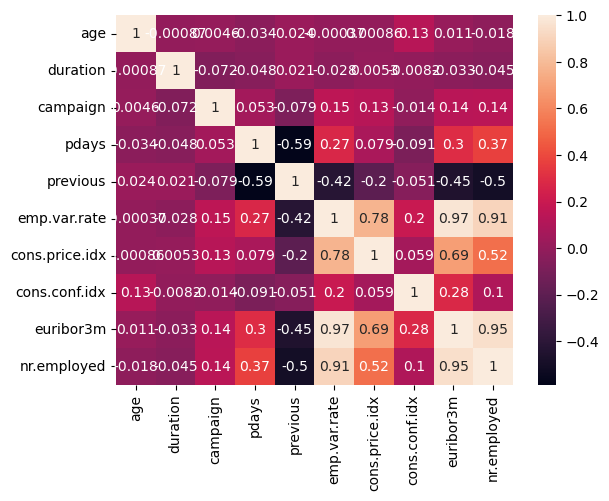

In [13]:
sns.heatmap(df.corr(),annot = True)

# EVALUATION OF CATEGORICAL VARIABLE:

<Axes: >

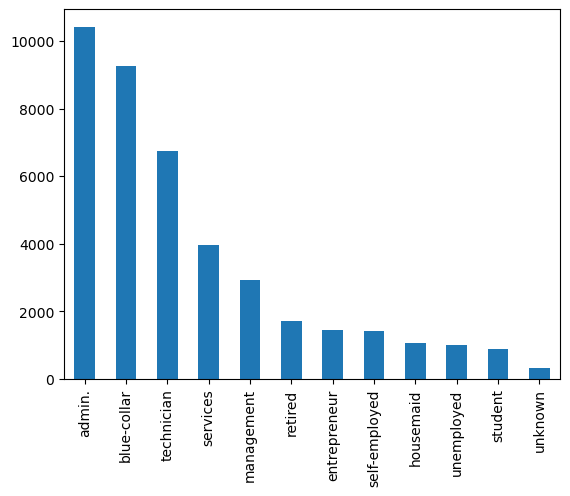

In [15]:
df['job'].value_counts().plot(kind = 'bar')

***In terms of job, admin clients has the most subscription to the term deposit than other job clients.***

<Axes: >

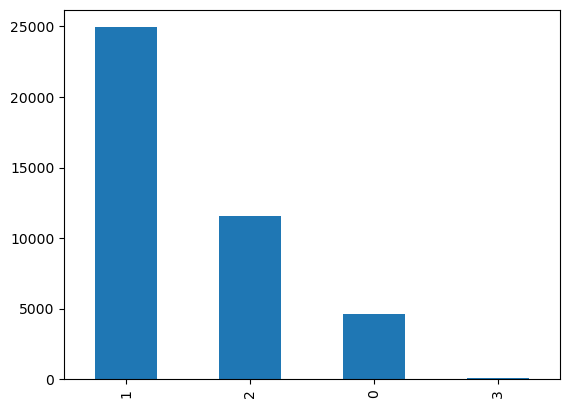

In [108]:
df['marital'].value_counts().plot(kind = 'bar')

***In terms martial status whether it be married,single or divorced clients has not subscribed to term deposits.***

<Axes: >

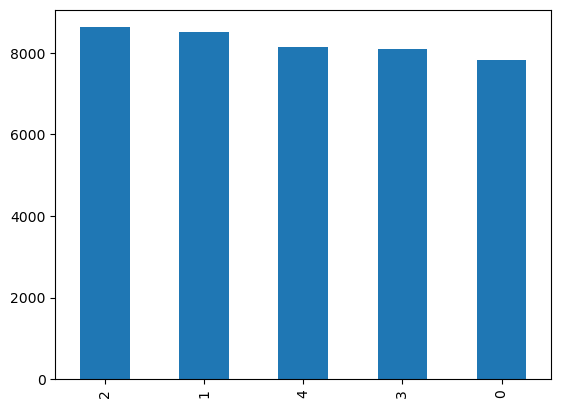

In [109]:
df['education'].value_counts().plot(kind = 'bar')

***In terms of  education, University degree clients has the most subscription to the term deposit than other education qualifications***

<Axes: >

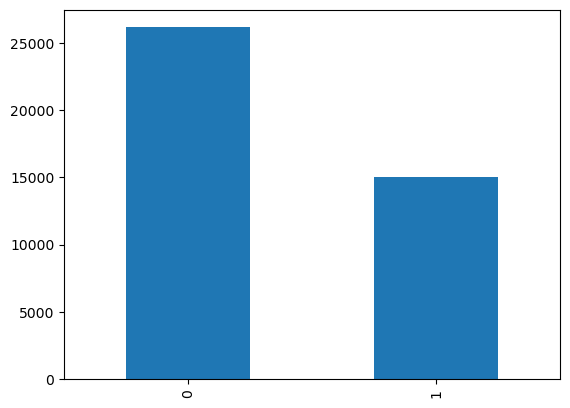

In [110]:
df['contact'].value_counts().plot(kind = 'bar')

***In terms of  contact, clients has the cellular type contact has subscription to the term deposit than the telephone users.***

<Axes: >

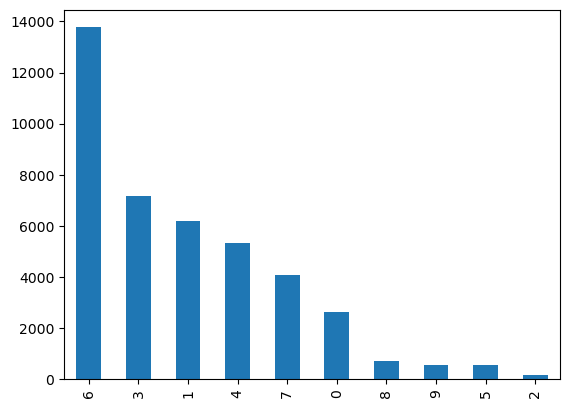

In [111]:
df['month'].value_counts().plot(kind = 'bar')

***In terms of months, may month clients has the most subscription to the term deposit than other months.***

<Axes: >

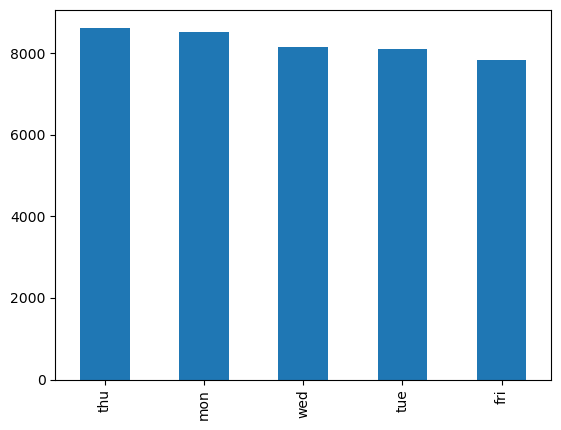

In [21]:
df['day_of_week'].value_counts().plot(kind = 'bar')

***In terms of days, thursday and monday clients are more preffered to take the subscription to the term deposit than other days.***

<Axes: >

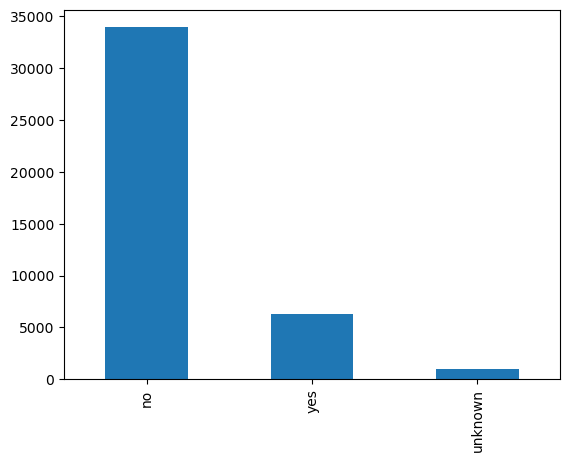

In [23]:
df['loan'].value_counts().plot(kind = 'bar')

<Axes: xlabel='duration', ylabel='Density'>

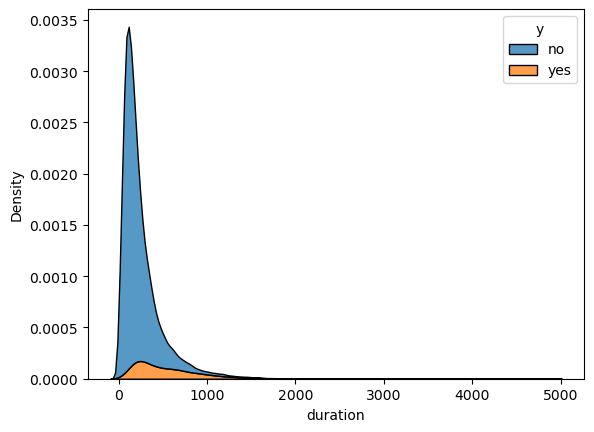

In [22]:
sns.kdeplot(data=df, x="duration", hue="y", multiple="stack")

***Duration and independent varible y both are not normaly distributed(non-linear).***

<Axes: xlabel='pdays', ylabel='Density'>

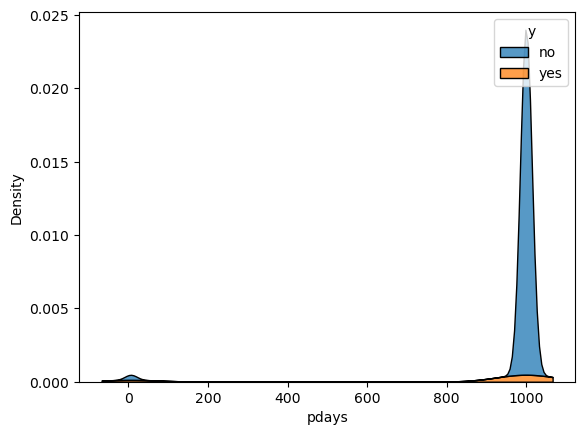

In [24]:
sns.kdeplot(data=df, x="pdays", hue="y", multiple="stack")

<Axes: xlabel='previous', ylabel='Density'>

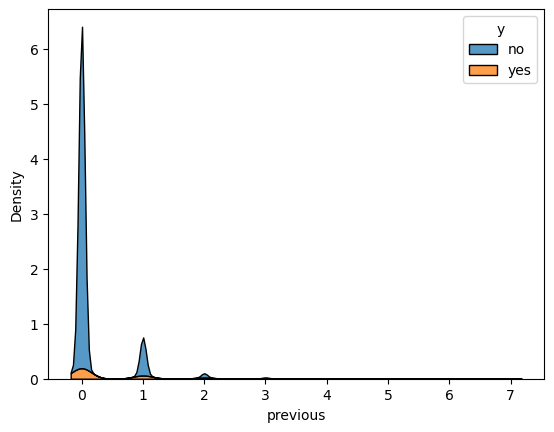

In [25]:
sns.kdeplot(data=df, x="previous", hue="y", multiple="stack")

<Axes: xlabel='campaign', ylabel='Density'>

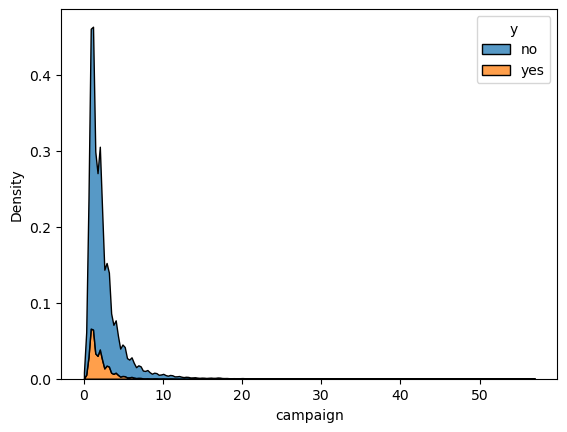

In [113]:
sns.kdeplot(data=df, x="campaign", hue="y", multiple="stack")

C:\Users\DELL\AppData\Local\Temp\ipykernel_4124\3374460088.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['previous'] , kde = True)


<Axes: xlabel='previous', ylabel='Density'>

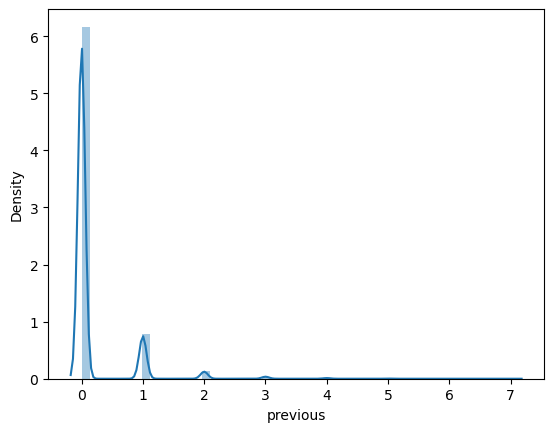

In [27]:
sns.distplot(df['previous'] , kde = True)

# EXPLORATORY DATA ANALYSIS:

# Missing value handling:

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Performing Lable Encoding:

In [31]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['job']= label_encoder.fit_transform(df['job'])

In [37]:
df['marital']= label_encoder.fit_transform(df['marital'])
df['education']= label_encoder.fit_transform(df['education'])

In [38]:
df['default']= label_encoder.fit_transform(df['default'])
df['housing']= label_encoder.fit_transform(df['housing'])
df['loan']= label_encoder.fit_transform(df['loan'])
df['contact']= label_encoder.fit_transform(df['contact'])
df['month']= label_encoder.fit_transform(df['month'])
df['day_of_week']= label_encoder.fit_transform(df['day_of_week'])
df['poutcome']= label_encoder.fit_transform(df['poutcome'])

In [39]:
df.dtypes

age                 int64
job                 int32
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [40]:
df.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4124\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.001250,-0.389753,-0.017572,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,-0.000866,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725
job,0.001250,1.000000,0.027897,-0.000844,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,-0.006490,-0.006923,-0.028468,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574
marital,-0.389753,0.027897,1.000000,0.002202,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,0.010290,-0.007240,-0.037942,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199
education,-0.017572,-0.000844,0.002202,1.000000,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,0.021950,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380
default,0.164965,-0.028277,-0.079450,-0.008701,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,-0.011794,0.032825,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845
housing,-0.001603,0.006962,0.010467,0.003339,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.007658,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862
loan,-0.007368,-0.010209,0.005788,-0.009344,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,-0.000916,0.005166,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903
contact,0.007021,-0.025132,-0.054501,-0.009575,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,-0.026657,0.077368,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155
month,-0.024877,-0.033213,-0.007629,0.027677,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,0.003690,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425
day_of_week,-0.017572,-0.000844,0.002202,1.000000,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,0.021950,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380


#  Selecting important features based on Random Forest.

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [42]:
X = df.drop(['y'], axis=1)

y = df['y']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [44]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [45]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

duration          0.320417
euribor3m         0.124932
age               0.097792
nr.employed       0.064310
job               0.055803
campaign          0.044495
pdays             0.032632
education         0.029092
day_of_week       0.028834
marital           0.026357
cons.conf.idx     0.025812
poutcome          0.023353
housing           0.021673
cons.price.idx    0.021159
month             0.019368
loan              0.016048
emp.var.rate      0.015821
previous          0.012919
contact           0.009691
default           0.009492
dtype: float64

The most important feature is duration  and least important feature is default

In [46]:
feature_scores.head(5)

duration       0.320417
euribor3m      0.124932
age            0.097792
nr.employed    0.064310
job            0.055803
dtype: float64

# Handling unbalanced data.

<Axes: >

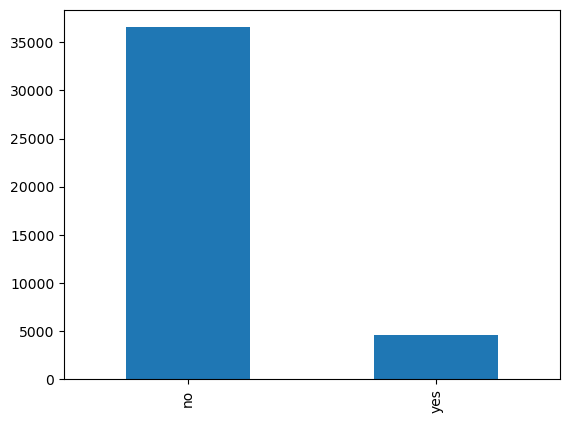

In [53]:
df['y'].value_counts().plot(kind = 'bar')

From the above plot, it is evident that the dataset is highly imbalanced as  there are unequal distribution of classes within a dataset.

In [48]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [49]:
import collections

In [55]:
X_train.shape

(28831, 20)

In [51]:
from imblearn.over_sampling import SMOTE
counter=collections.Counter(y_train)
print('Before Sampling',counter)
smt=SMOTE()
X_train,y_train=smt.fit_resample(X_train,y_train)
counter=collections.Counter(y_train_smote)
print('After Sampling',counter)

Before Sampling Counter({'no': 25579, 'yes': 3252})
After Sampling Counter({'no': 25579, 'yes': 25579})


# standardize the data using scalers.

In [58]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)